In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

from src.data.data_loader import audio_loader
from src.data.h5_loader import load_h5


In [2]:
array_data = load_h5('\data\smc_mirum_tempo.h5',size=64)

In [28]:
y, sr =array_data[0][10],44100

441000

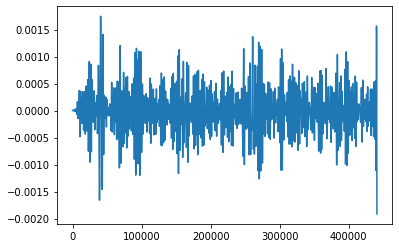

In [36]:
plt.plot(y)
len(y)

In [30]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

C:\Users\Caléo\AppData\Local\Temp\ipykernel_17896\473892238.py:1: FutureWarning: Pass y=[ 1.49905630e-06  1.51371915e-06  1.52838352e-06 ... -1.89348475e-03
 -1.90329209e-03 -1.91309951e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,


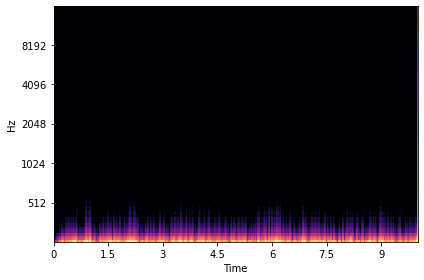

In [31]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)


plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

In [32]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length,
                                           units='time')

In [33]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      hop_length=hop_length,
                                      units='time')

In [34]:
onset_sf

array([0.16462585, 0.2244898 , 0.32426304, 0.369161  , 0.44897959,
       0.49886621, 0.5537415 , 0.69342404, 0.8031746 , 0.84807256,
       0.8829932 , 0.91791383, 0.95283447, 1.00272109, 1.09750567,
       1.14240363, 1.22721088, 1.26712018, 1.3569161 , 1.44172336,
       1.48163265, 1.5414966 , 1.65124717, 1.76598639, 1.85578231,
       1.94058957, 1.98548753, 2.03537415, 2.10521542, 2.17505669,
       2.21496599, 2.26984127, 2.39954649, 2.44943311, 2.52426304,
       2.55918367, 2.65396825, 2.73378685, 2.84353741, 2.88344671,
       2.92834467, 2.99319728, 3.0430839 , 3.11292517, 3.21269841,
       3.27755102, 3.36235828, 3.41723356, 3.46712018, 3.60181406,
       3.64671202, 3.72154195, 3.77142857, 3.81632653, 3.91111111,
       3.95600907, 4.02585034, 4.08571429, 4.12063492, 4.16553288,
       4.22539683, 4.27528345, 4.34013605, 4.41496599, 4.48979592,
       4.52970522, 4.57460317, 4.67437642, 4.71927438, 4.79909297,
       4.88390023, 4.91882086, 5.05351474, 5.0984127 , 5.14331

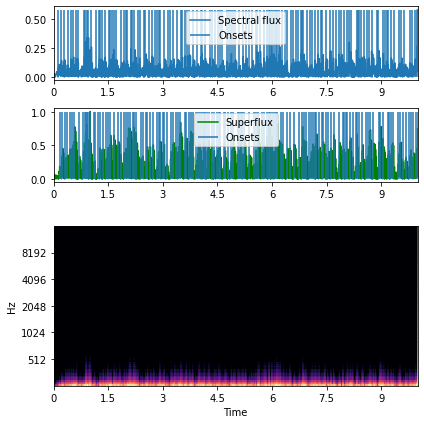

In [35]:
# sphinx_gallery_thumbnail_number = 2
plt.figure(figsize=(6, 6))

frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

ax = plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.axis('tight')


plt.subplot(4, 1, 1, sharex=ax)
plt.plot(frame_time, odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')
plt.legend()


plt.subplot(4, 1, 2, sharex=ax)
plt.plot(frame_time, odf_sf, color='g', label='Superflux')
plt.vlines(onset_sf, 0, odf_sf.max(), label='Onsets')
plt.legend()

plt.tight_layout()
plt.show()